In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/urban-sound-8k-images/UrbanSound8K.csv
/kaggle/input/urban-sound-8k-images/Images/Images/fold7/84143-2-0-12.wav.jpg
/kaggle/input/urban-sound-8k-images/Images/Images/fold7/83488-1-0-0.wav.jpg
/kaggle/input/urban-sound-8k-images/Images/Images/fold7/61503-2-0-2.wav.jpg
/kaggle/input/urban-sound-8k-images/Images/Images/fold7/57696-4-0-5.wav.jpg
/kaggle/input/urban-sound-8k-images/Images/Images/fold7/123685-5-0-0.wav.jpg
/kaggle/input/urban-sound-8k-images/Images/Images/fold7/39857-5-2-0.wav.jpg
/kaggle/input/urban-sound-8k-images/Images/Images/fold7/183992-3-0-9.wav.jpg
/kaggle/input/urban-sound-8k-images/Images/Images/fold7/77751-7-2-0.wav.jpg
/kaggle/input/urban-sound-8k-images/Images/Images/fold7/39857-5-0-0.wav.jpg
/kaggle/input/urban-sound-8k-images/Images/Images/fold7/168846-5-0-0.wav.jpg
/kaggle/input/urban-sound-8k-images/Images/Images/fold7/158593-2-0-52.wav.jpg
/kaggle/input/urban-sound-8k-images/Images/Images/fold7/85662-3-0-0.wav.jpg
/kaggle/input/urban-sound-8k-

In [2]:
%ls

__notebook__.ipynb


>Importing requisite libraries

In [3]:
import cv2
import os
import pandas as pd
import numpy as np
from tqdm import tqdm

In [4]:
%pwd

'/kaggle/working'

>Reading UrbanSound8K.csv (Metadata)
---
Metadata: Metadata is "data that provides information about other data". In other words, it is "data about data". 


In [5]:
df = pd.read_csv("../input/urban-sound-8k-images/UrbanSound8K.csv")
df

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.000000,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.500000,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.500000,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.000000,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.500000,72.500000,1,5,2,children_playing
...,...,...,...,...,...,...,...,...
8727,99812-1-2-0.wav,99812,159.522205,163.522205,2,7,1,car_horn
8728,99812-1-3-0.wav,99812,181.142431,183.284976,2,7,1,car_horn
8729,99812-1-4-0.wav,99812,242.691902,246.197885,2,7,1,car_horn
8730,99812-1-5-0.wav,99812,253.209850,255.741948,2,7,1,car_horn


>Visualizing a few images
---
To make sure it is working

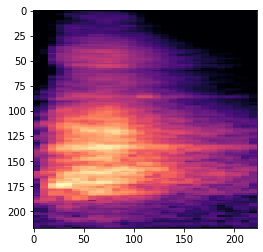

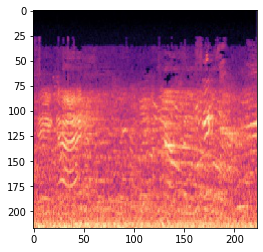

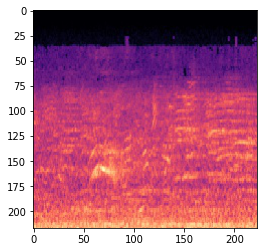

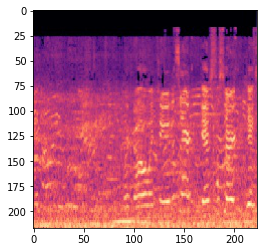

In [6]:
from matplotlib import pyplot
from matplotlib.image import imread
%matplotlib inline
for i in range(4):
    filename = '../input/urban-sound-8k-images/Images/Images/fold' + str(df["fold"][i]) + '/' + df["slice_file_name"][i] + '.jpg'
    image = imread(filename)
    pyplot.imshow(image)
    pyplot.show()

>Stacking images in the form of a numpy array and saving it to Google drive for later use. This is to save processing time.
---
Storing it as file "X.npy"

In [7]:
from numpy import asarray
from numpy import save
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

X = []

# enumerate files in the directory
for i in tqdm(range(8732)):
    filename = '../input/urban-sound-8k-images/Images/Images/fold' + str(df["fold"][i]) + '/' + df["slice_file_name"][i] + '.jpg'
    photo = load_img(filename, target_size=(224, 224))
    # convert to numpy array
    photo = img_to_array(photo, dtype=np.float16)
    # store
    X.append(photo)
# convert to a numpy arrays
X = asarray(X)
print(X.shape)
# save the reshaped photos
save('X.npy', X)

100%|██████████| 8732/8732 [01:00<00:00, 143.97it/s]


(8732, 224, 224, 3)


>Creating labels and storing in array Y
---
Storing it as file "label.npy"

In [8]:
Y = []
for i in tqdm(range(8732)):
    Y.append(df["classID"])
Y = np.asarray(Y)
Y = Y[0:1]
Y = Y.reshape(8732,)
Y.shape
save('label.npy',Y)

100%|██████████| 8732/8732 [00:00<00:00, 257829.37it/s]


Making sure we are working in the required directory

In [9]:
!ls

X.npy  __notebook__.ipynb  label.npy


>Do not run the below block now. Run it only if you have closed the notebook before this and starting again.

In [10]:
# from numpy import load
# X = load('X.npy')
# Y = load('label.npy')
# print(X.shape, Y.shape)
# print(type(X))
# print(type(Y))

>Printing label array Y to check its contents.

In [11]:
import sys 
np.set_printoptions(threshold=sys.maxsize)
#print(Y)

>One Hot Encoding

In [12]:
!pip install np_utils
import tensorflow as tf
from numpy import array
from numpy import argmax

# one hot encode
Y = tf.keras.utils.to_categorical(Y, num_classes=10)
#print(Y)

     |████████████████████████████████| 61 kB 874 kB/s 
  Created wheel for np-utils: filename=np_utils-0.5.12.1-py3-none-any.whl size=57125 sha256=0269d91641ecce04b7f568fa6d159172c516cdfb6634a4c4dcddd280881caf26
  Stored in directory: /root/.cache/pip/wheels/8c/4e/ef/095c24693723c329f4cdc1079861cdbb2487d4b41b2496a4e7
Successfully built np-utils


>80% for test and 20% for train.

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

>Checking contents of RAM



In [14]:
%whos

Variable           Type                          Data/Info
----------------------------------------------------------
X                  ndarray                       8732x224x224x3: 1314410496 elems, type `float16`, 2628820992 bytes (2507.0390625 Mb)
X_test             ndarray                       1747x224x224x3: 262972416 elems, type `float16`, 525944832 bytes (501.580078125 Mb)
X_train            ndarray                       6985x224x224x3: 1051438080 elems, type `float16`, 2102876160 bytes (2005.458984375 Mb)
Y                  ndarray                       8732x10: 87320 elems, type `float32`, 349280 bytes (341.09375 kb)
Y_test             ndarray                       1747x10: 17470 elems, type `float32`, 69880 bytes
Y_train            ndarray                       6985x10: 69850 elems, type `float32`, 279400 bytes (272.8515625 kb)
argmax             function                      <function argmax at 0x7fc1bc15bef0>
array              builtin_function_or_method    <built-in func

> Clearing RAM due to memory limitations

In [15]:
import gc
gc.collect()
del X 
del Y 
gc.collect()

0

In [16]:
%whos

Variable           Type                          Data/Info
----------------------------------------------------------
X_test             ndarray                       1747x224x224x3: 262972416 elems, type `float16`, 525944832 bytes (501.580078125 Mb)
X_train            ndarray                       6985x224x224x3: 1051438080 elems, type `float16`, 2102876160 bytes (2005.458984375 Mb)
Y_test             ndarray                       1747x10: 17470 elems, type `float32`, 69880 bytes
Y_train            ndarray                       6985x10: 69850 elems, type `float32`, 279400 bytes (272.8515625 kb)
argmax             function                      <function argmax at 0x7fc1bc15bef0>
array              builtin_function_or_method    <built-in function array>
asarray            function                      <function asarray at 0x7fc1bc1b3ef0>
cv2                module                        <module 'cv2.cv2' from '/<...>37m-x86_64-linux-gnu.so'>
df                 DataFrame                  

In [17]:
print("X_train shape: ", X_train.shape)
print("Y_train shape: ", Y_train.shape)
print("X_test shape: ", X_test.shape)
print("Y_test shape: ", Y_test.shape)

X_train shape:  (6985, 224, 224, 3)
Y_train shape:  (6985, 10)
X_test shape:  (1747, 224, 224, 3)
Y_test shape:  (1747, 10)


>Defining Model

In [18]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten

In [19]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(224, 224, 3)))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPool2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 128)       1

>Optimizer: Adam
---
>Learning Rate: 0.001
---
>Loss: Categorical Crossentropy

In [20]:
from keras.optimizers import Adam
import keras
opt = Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

> Model Fitting
---
>Batch size: 128
---
>Epochs: 50
---
>Monitor Validation accuracy and save best model.

In [21]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
filepath = 'VGG4_best.hdf5'
checkpoint = ModelCheckpoint(filepath=filepath,monitor='val_accuracy',verbose=1,save_best_only=True,mode='max')
callbacks = [checkpoint]
history = model.fit(X_train, Y_train, batch_size=128, epochs = 50, validation_data = (X_test, Y_test), callbacks=callbacks, verbose = 1)

Epoch 1/50
55/55 [==============================] - 63s 993ms/step - loss: 196.5200 - accuracy: 0.1565 - val_loss: 1.7135 - val_accuracy: 0.4024

Epoch 00001: val_accuracy improved from -inf to 0.40240, saving model to VGG4_best.hdf5
Epoch 2/50
55/55 [==============================] - 47s 856ms/step - loss: 1.6737 - accuracy: 0.4496 - val_loss: 1.2878 - val_accuracy: 0.5398

Epoch 00002: val_accuracy improved from 0.40240 to 0.53978, saving model to VGG4_best.hdf5
Epoch 3/50
55/55 [==============================] - 47s 858ms/step - loss: 1.1526 - accuracy: 0.6148 - val_loss: 0.9603 - val_accuracy: 0.6720

Epoch 00003: val_accuracy improved from 0.53978 to 0.67201, saving model to VGG4_best.hdf5
Epoch 4/50
55/55 [==============================] - 47s 856ms/step - loss: 0.9120 - accuracy: 0.6980 - val_loss: 0.8592 - val_accuracy: 0.7109

Epoch 00004: val_accuracy improved from 0.67201 to 0.71093, saving model to VGG4_best.hdf5
Epoch 5/50
55/55 [==============================] - 47s 853ms

>Train vs Test accuracy

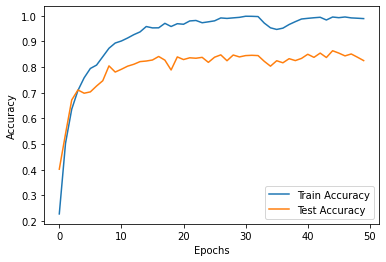

In [22]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

>Training loss vs Validation loss

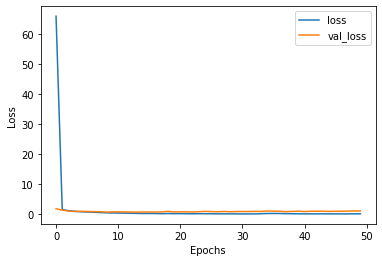

In [23]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [24]:
gc.collect()
model = keras.models.load_model("VGG4_best.hdf5")

In [25]:
score = model.evaluate(X_test, Y_test)
print(score)

55/55 [==============================] - 11s 172ms/step - loss: 0.9300 - accuracy: 0.8535
[0.9299734234809875, 0.8534630537033081]


In [26]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
Y_pred = model.predict(X_test)
Y_pred=np.argmax(Y_pred, axis=1)
Y_test=np.argmax(Y_test, axis=1)
cm = confusion_matrix(Y_test, Y_pred)

In [27]:
print(cm)

[[181   1   6   4   0   4   0   1   1   5]
 [  0  74   3   2   1   0   0   1   1   4]
 [  1   0 147  13   4   4   0   0   3  11]
 [  2   0  16 170   2   3   0   0   2   6]
 [  4   3   8   7 163   3   0  10   1   7]
 [  2   0   7   1   1 175   0   0   2   5]
 [  0   0   1   7   2   0  62   0   0   0]
 [  2   0   1   2   3   3   0 193   0   4]
 [  1   0   2   4   0   2   1   0 150   5]
 [  2   2  32   8   1   4   0   0   2 179]]
